In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from scipy.stats import gaussian_kde

In [2]:
df = pd.read_csv('bicicletas-compartidas.csv')
df.head()

,fecha,bicis-compartidas,temp-obs,sens-temp,hum,viento,codigo-clima,festivo,findesemana,cuartil-ano
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
cuartiles = df['cuartil-ano'].apply(lambda x : 'cuatil-'+str(int(x))) 
cuartiles.head()

0    cuatil-3
1    cuatil-3
2    cuatil-3
3    cuatil-3
4    cuatil-3
Name: cuartil-ano, dtype: object

In [4]:
cuartiles.shape

(17414,)

# Bar plot

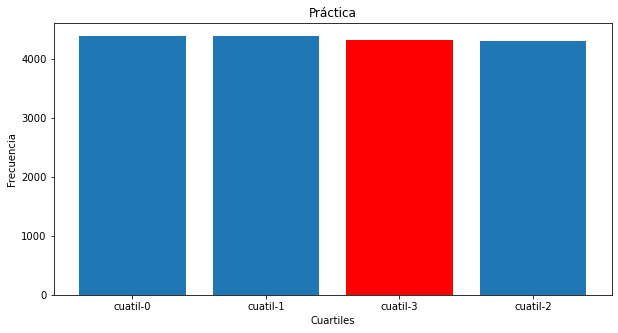

In [5]:
fig , ax = plt.subplots(figsize=(10,5))
ax.bar(cuartiles.value_counts().index,cuartiles.value_counts())
ax.set_title('Práctica')
ax.set_xlabel('Cuartiles')
ax.set_ylabel('Frecuencia')
#Cambiar el color de una barra
ax.patches[2].set_facecolor('red')
plt.show()

# Pie chart

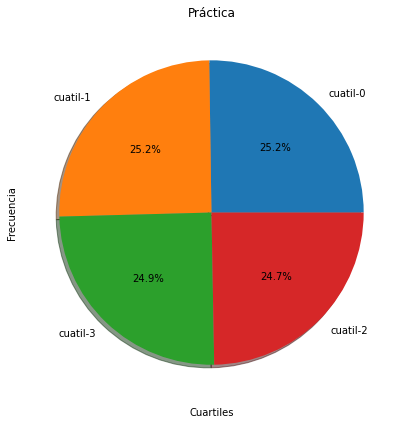

In [6]:
fig , ax = plt.subplots(figsize=(15,7))
ax.pie(cuartiles.value_counts(),labels=cuartiles.value_counts().index,shadow=True,autopct='%1.1f%%')
ax.set_title('Práctica')
ax.set_xlabel('Cuartiles')
ax.set_ylabel('Frecuencia')
plt.show()

$\lambda$

# Histogram

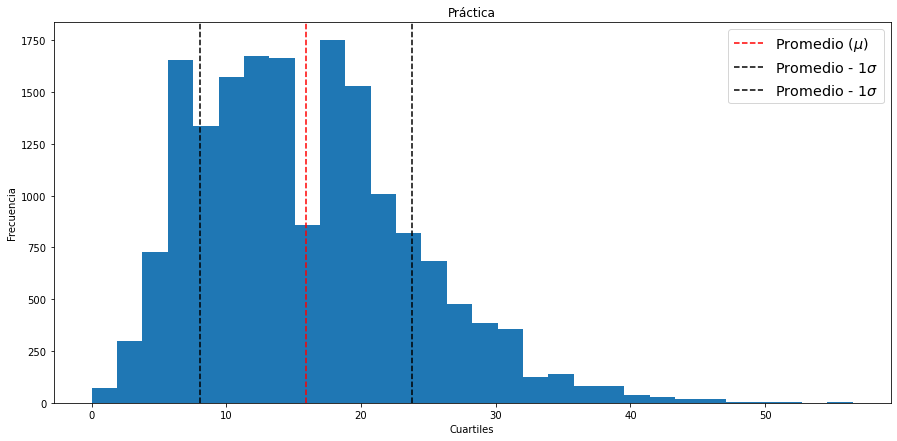

In [7]:
fig , ax = plt.subplots(figsize=(15,7))
ax.hist(df['viento'],bins=30)
ax.set_title('Práctica')
ax.set_xlabel('Cuartiles')
ax.set_ylabel('Frecuencia')
ax.axvline(np.mean(df['viento']),c ='r',linestyle='--',label='Promedio ($\mu$)')
ax.axvline(np.mean(df['viento']) + np.std(df['viento']) ,c ='k',linestyle='--',label='Promedio - 1$\sigma$')
ax.axvline(np.mean(df['viento']) - np.std(df['viento']) ,c ='k',linestyle='--',label='Promedio - 1$\sigma$')
plt.legend(fontsize='x-large')
plt.show()

# Box plot

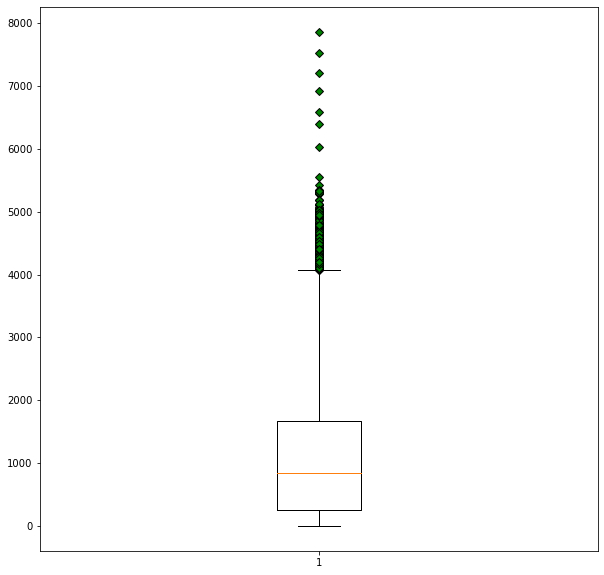

In [8]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure(figsize=(10,10))
plt.boxplot(df['bicis-compartidas'],flierprops=green_diamond,whis=1.7)
plt.show()

<AxesSubplot:xlabel='cuartil-ano', ylabel='bicis-compartidas'>

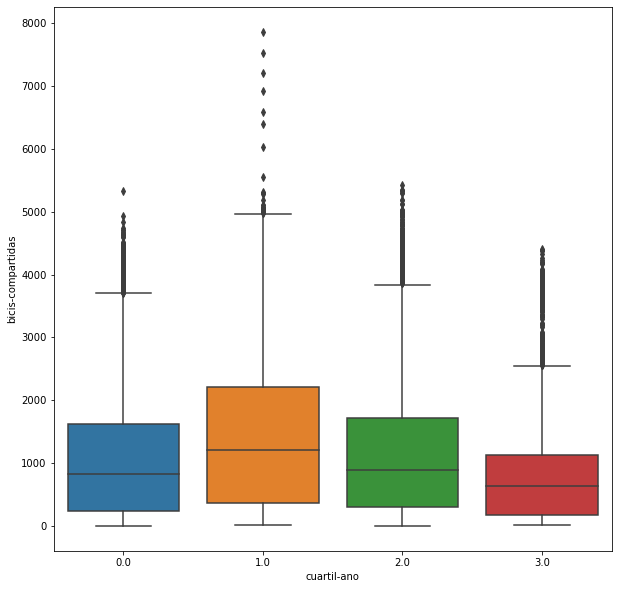

In [9]:
fig , ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = df['cuartil-ano'], y = df['bicis-compartidas'])

# Scatter plot

In [11]:
df['bicis-compartidas'].value_counts()

46      46
53      39
70      36
33      36
120     36
        ..
3590     1
1559     1
3670     1
3718     1
0        1
Name: bicis-compartidas, Length: 3781, dtype: int64

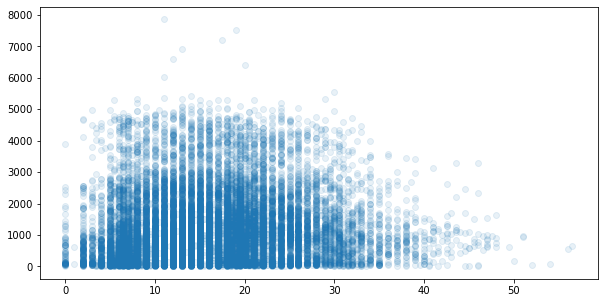

In [30]:
fig , ax = plt.subplots(figsize=(10,5))
ax.scatter(df['viento'], df['bicis-compartidas'],alpha=0.1)

In [13]:
np.vstack([df['viento'], df['bicis-compartidas']])

array([[  6.,   5.,   0., ...,  24.,  23.,  22.],
       [182., 138., 134., ..., 337., 224., 139.]])

In [16]:
gaussian_kde(xy)(xy)

array([2.94748559e-05, 2.29391804e-05, 2.30711432e-06, ...,
       9.12638795e-06, 1.10198235e-05, 1.24467836e-05])

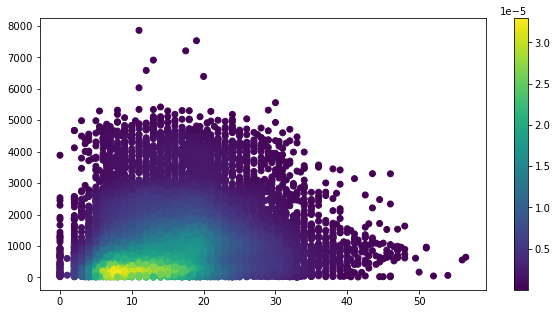

In [28]:
#Apilar matrices en secuencia verticalmente (por filas)
xy = np.vstack([df['viento'], df['bicis-compartidas']])
#Calcula la densidad de los puntos
z  = gaussian_kde(xy)(xy)

fig , ax = plt.subplots(figsize=(10,5))
cs = ax.scatter(df['viento'], df['bicis-compartidas'],c=z,cmap='viridis')
fig.colorbar(cs,ax=ax)